# Task 1: Data Analysis and Insights Generation

Instructions:
1. Obtain a real-world dataset related to a specific domain (e.g., sales, marketing, customer behavior).
2. Perform exploratory data analysis using appropriate tools (Python, R, data visualization platforms).
3. Clean and preprocess the data, handling missing values, outliers, and inconsistent formats.
4. Conduct statistical analysis, applying measures like mean, median, standard deviation, and correlation coefficients.
5. Apply advanced analytical methods (regression analysis, clustering) to identify patterns and trends.
6. Use data visualization techniques to present findings effectively (charts, graphs).
7. Interpret results, providing actionable insights and recommendations aligned with business objectives.
8. Prepare a comprehensive report summarizing the analysis approach, key findings, and recommendations.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

In [2]:
data = pd.read_csv("Datasets/credit_approval/crx.data",header=None,na_values="?")

In [3]:
# data.head()
data.info()
# data[0].value_counts()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   1       678 non-null    float64
 2   2       690 non-null    float64
 3   3       684 non-null    object 
 4   4       684 non-null    object 
 5   5       681 non-null    object 
 6   6       681 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      677 non-null    float64
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


,1,2,7,10,13,14
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


### Dataset details: 
- Male&emsp;           A1:	b, a.<br>
- Age&emsp;            A2:	continuous.<br>
- Debt&emsp;           A3:	continuous.<br>
- Married&emsp;        A4:	u, y, l, t.<br>
- BankCustomer&emsp;   A5:	g, p, gg.<br>
- EducationLevel&emsp; A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.<br>
- Ethnicity&emsp;      A7:	v, h, bb, j, n, z, dd, ff, o.<br>
- YearsEmployed&emsp;  A8:	continuous.<br>
- PriorDefault&emsp;   A9:	t, f.<br>
- Employed&emsp;       A10:	t, f.<br>
- CreditScore&emsp;    A11:	continuous.<br>
- DriversLicense&emsp; A12:	t, f.<br>
- Citizen&emsp;        A13:	g, p, s.<br>
- ZipCode&emsp;        A14:	continuous.<br>
- Income&emsp;         A15:	continuous.<br>
- Approved&emsp;       A16: +,-         (class attribute)<br>
- (from crx.names file, Source:https://archive.ics.uci.edu/dataset/27/credit+approval)<br>
- (Column descriptions, Reference:http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>]], dtype=object)

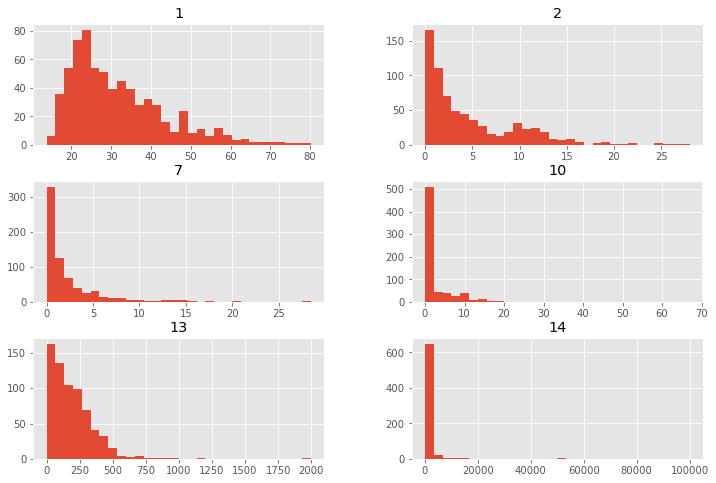

In [4]:
data.hist(bins=30,figsize=(12,8))

In [5]:
numeric = [1, 2, 7, 10, 14]
#A14 is zip code. Should be treated as categorical rather than numeric "data[13]"
data_num = data[numeric]
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       678 non-null    float64
 1   2       690 non-null    float64
 2   7       690 non-null    float64
 3   10      690 non-null    int64  
 4   14      690 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 27.1 KB


In [6]:
categorical = [0, 3, 4, 5, 6, 8, 9, 11, 12, 13]
data_cat = data[categorical]
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       678 non-null    object 
 1   3       684 non-null    object 
 2   4       684 non-null    object 
 3   5       681 non-null    object 
 4   6       681 non-null    object 
 5   8       690 non-null    object 
 6   9       690 non-null    object 
 7   11      690 non-null    object 
 8   12      690 non-null    object 
 9   13      677 non-null    float64
dtypes: float64(1), object(9)
memory usage: 54.0+ KB


In [7]:
data_target = data[15].replace({'+':1, '-':0})
data_target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 690 entries, 0 to 689
Series name: 15
Non-Null Count  Dtype
--------------  -----
690 non-null    int64
dtypes: int64(1)
memory usage: 5.5 KB


### Data Pre-processing cleaning, missing values and outliers
- Taking mean for Age column in data_num
- Checking for outliers in Numerical columns and removing outliers
- Filling categorical columns with mode value of that column in data_cat
- Converting Categorical values to numerical by Label Encoder

In [8]:
# data_num.info()
data_num = data_num.fillna(data_num.mean())
# data_num.head()

C:\Users\MAHAVIR\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: 2, dtype: float64

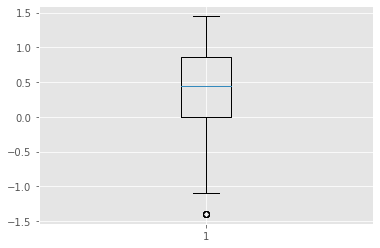

In [9]:
# numeric = [1,2,7,10,14]
plt.boxplot(np.log10(data_num[2]))
data_num[2].describe()

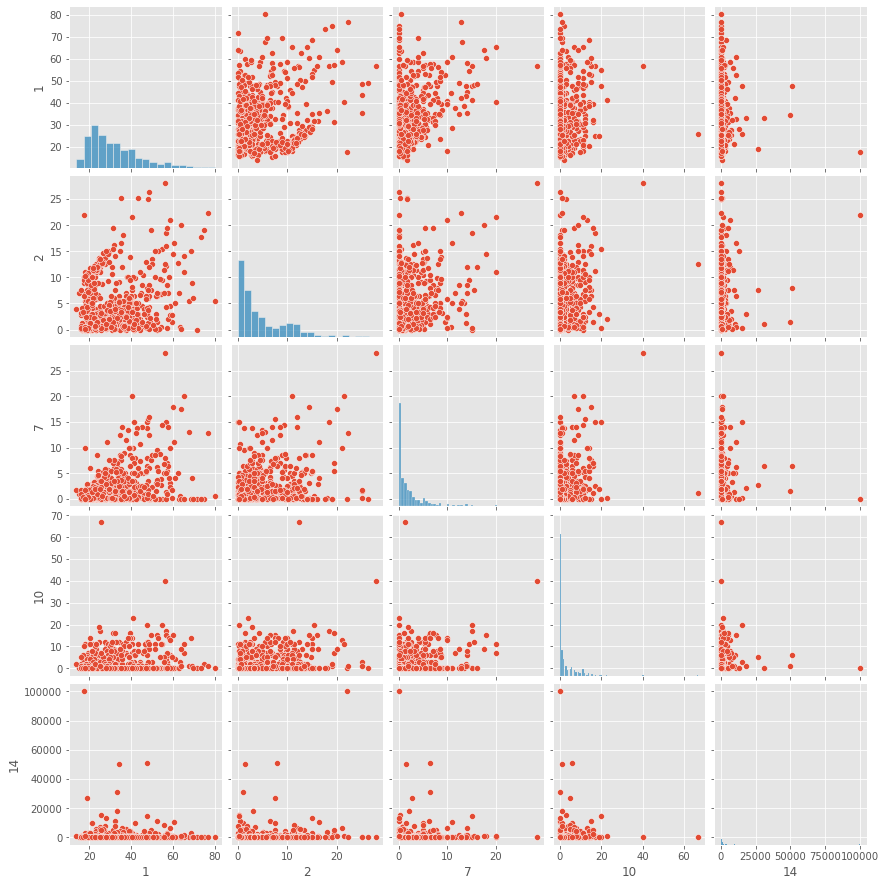

In [10]:
sns.pairplot(data[[1,2,7,10,14]])

In [23]:
for column in data_cat.columns:
  data_cat[column] = data_cat[column].fillna(data_cat[column].value_counts().index[0])
# data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       690 non-null    int32
 1   3       690 non-null    int32
 2   4       690 non-null    int32
 3   5       690 non-null    int32
 4   6       690 non-null    int32
 5   8       690 non-null    int32
 6   9       690 non-null    int32
 7   11      690 non-null    int32
 8   12      690 non-null    int32
 9   13      690 non-null    int64
dtypes: int32(9), int64(1)
memory usage: 29.8 KB


In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data_cat.columns:
    data_cat[column] = label_encoder.fit_transform(data_cat[column])
    
# data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       690 non-null    int32
 1   3       690 non-null    int32
 2   4       690 non-null    int32
 3   5       690 non-null    int32
 4   6       690 non-null    int32
 5   8       690 non-null    int32
 6   9       690 non-null    int32
 7   11      690 non-null    int32
 8   12      690 non-null    int32
 9   13      690 non-null    int64
dtypes: int32(9), int64(1)
memory usage: 29.8 KB


In [13]:
data_cleaned = pd.concat([data_num,data_cat,data_target],axis=1)
# data_cleaned.info()
# data_cleaned.head()

### Scaling the Data using MinMaxScaler and saving clean dataset

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
clean_data = scaler.fit_transform(data_cleaned)

In [15]:
clean_data = pd.DataFrame(clean_data)
# clean_data.head()
clean_data.to_csv('Datasets/credit_approval/clean_data.data')

### Performing Analysis of Data through plots 
- Statistical analysis of dataset (mean, std, min, max)
- Performing Kmeans clustering on 2 principal components
- Generating Heatmap for checking correlation
- Checking correlation between target and each feature using scatter plots

In [16]:
data_cleaned.describe()

,1,2,7,10,14,0,3,4,5,6,8,9,11,12,13,15
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,0.695652,1.233333,0.475362,5.698551,5.098551,0.523188,0.427536,0.457971,0.176812,56.189855,0.444928
std,11.853273,4.978163,3.346513,4.86294,5210.102598,0.460464,0.430063,0.850238,4.285748,2.510731,0.499824,0.495080,0.498592,0.557869,46.386934,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000,1.000000,1.000000,0.000000,5.000000,7.000000,1.000000,0.000000,0.000000,0.000000,52.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000,1.000000,1.000000,0.000000,10.000000,7.000000,1.000000,1.000000,1.000000,0.000000,93.000000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000,2.000000,2.000000,13.000000,8.000000,1.000000,1.000000,1.000000,2.000000,169.000000,1.000000


In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

C:\Users\MAHAVIR\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\MAHAVIR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\MAHAVIR\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


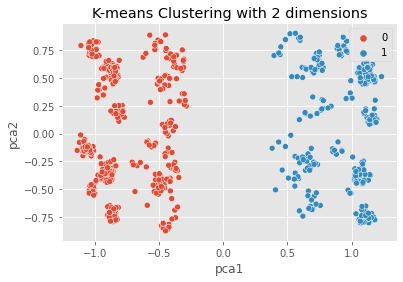

In [36]:
kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(clean_data)
clean_data['Cluster'] = y

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

reduced_data = PCA(n_components=2).fit_transform(clean_data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=y, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

- We can clearly see that the clusters can be separated easily based on pca1, there is high correlation between pca1 with Approval rate

Text(0.5, 1.0, 'Heatmap of Correlation')

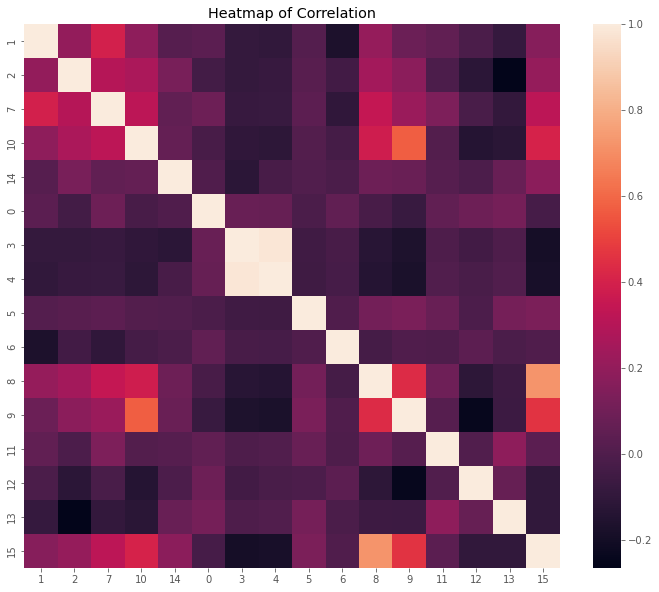

In [25]:
corr = data_cleaned.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

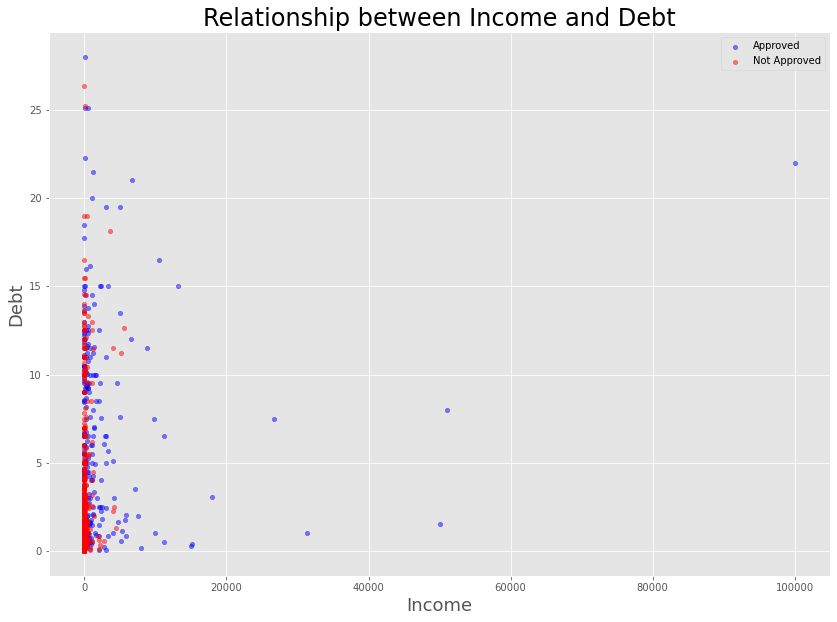

In [29]:
ax1 = data_cleaned[data_cleaned[15] == 1].plot(kind='scatter', x=14, y=2, color='blue', alpha=0.5, figsize=(14, 10))
data_cleaned[data_cleaned[15] == 0].plot(kind='scatter', x=14, y=2, color='red', alpha=0.5, figsize=(14, 10), ax=ax1)
plt.legend(labels=['Approved', 'Not Approved'])
plt.title('Relationship between Income and Debt', size=24)
plt.xlabel('Income', size=18)
plt.ylabel('Debt', size=18);

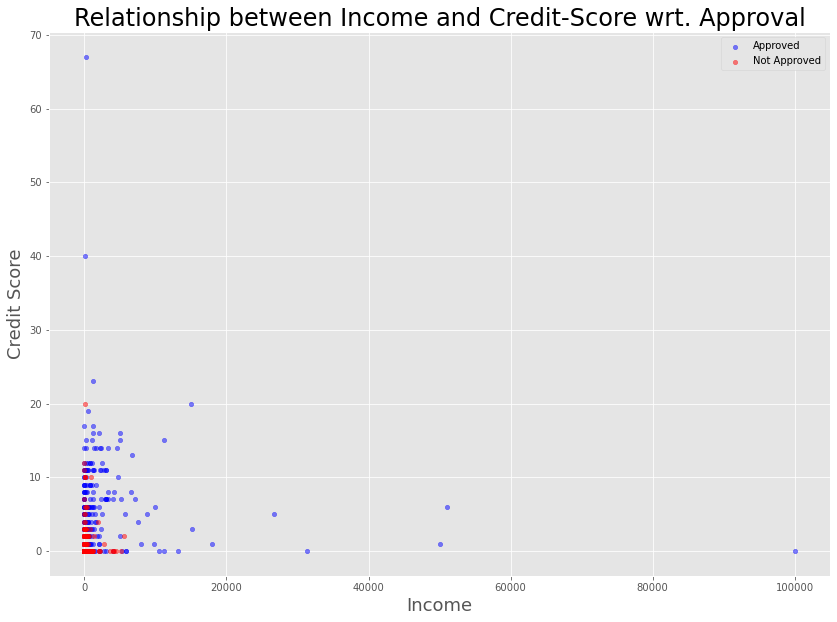

In [30]:
ax1 = data_cleaned[data_cleaned[15] == 1].plot(kind='scatter', x=14, y=10, color='blue', alpha=0.5, figsize=(14, 10))
data_cleaned[data_cleaned[15] == 0].plot(kind='scatter', x=14, y=10, color='red', alpha=0.5, figsize=(14, 10), ax=ax1)
plt.legend(labels=['Approved', 'Not Approved'])
plt.title('Relationship between Income and Credit-Score wrt. Approval', size=24)
plt.xlabel('Income', size=18)
plt.ylabel('Credit Score', size=18);

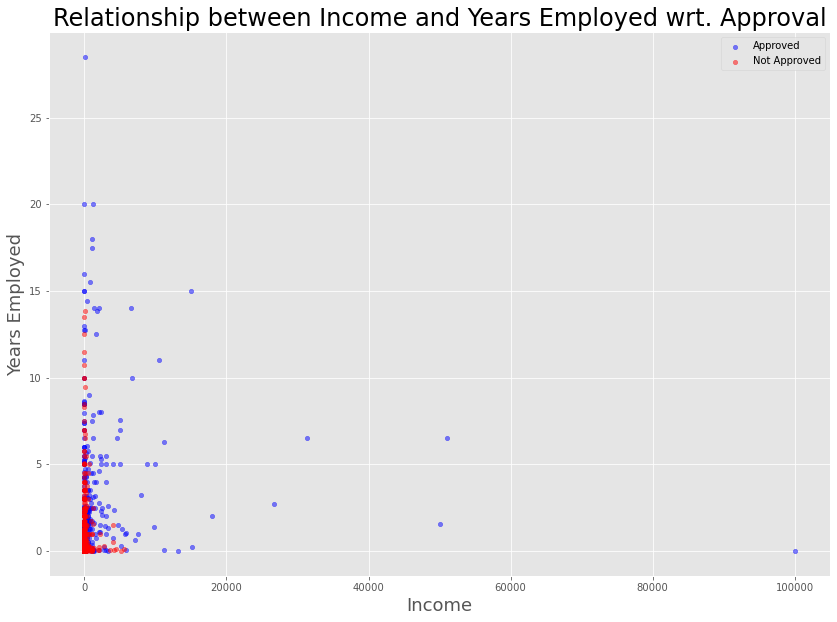

In [32]:
ax1 = data_cleaned[data_cleaned[15] == 1].plot(kind='scatter', x=14, y=7, color='blue', alpha=0.5, figsize=(14, 10))
data_cleaned[data_cleaned[15] == 0].plot(kind='scatter', x=14, y=7, color='red', alpha=0.5, figsize=(14, 10), ax=ax1)
plt.legend(labels=['Approved', 'Not Approved'])
plt.title('Relationship between Income and Years Employed wrt. Approval', size=24)
plt.xlabel('Income', size=18)
plt.ylabel('Years Employed', size=18);

- We can see that Credit Score, Income, Years-Employed, Debt have high correlation with Credit Card Approval
- Higher Income, Lower debt, More no. of Years of Employmeny and High Credit score gives High Approval rate
- Further Analysis is needed to arrive at actionable insights